In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# import panel as pn
import plotly.express as px
import plotly.io as pio
import datetime as dt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('daily_cases.csv', infer_datetime_format = True, parse_dates = True)

In [3]:
df

,Date,Cases
0,2020-03-14,8
1,2020-03-15,9
2,2020-03-16,6
3,2020-03-17,6
4,2020-03-18,23
...,...,...
124,2020-07-16,2160
125,2020-07-17,2051
126,2020-07-18,2481
127,2020-07-19,1820


In [4]:
df.dropna(inplace = True)

In [5]:
df

,Date,Cases
0,2020-03-14,8
1,2020-03-15,9
2,2020-03-16,6
3,2020-03-17,6
4,2020-03-18,23
...,...,...
124,2020-07-16,2160
125,2020-07-17,2051
126,2020-07-18,2481
127,2020-07-19,1820


In [6]:
df['Change'] = df['Cases'].pct_change()
df

,Date,Cases,Change
0,2020-03-14,8,NaN
1,2020-03-15,9,0.125000
2,2020-03-16,6,-0.333333
3,2020-03-17,6,0.000000
4,2020-03-18,23,2.833333
...,...,...,...
124,2020-07-16,2160,0.212121
125,2020-07-17,2051,-0.050463
126,2020-07-18,2481,0.209654
127,2020-07-19,1820,-0.266425


In [7]:
df.dropna(inplace = True)

In [8]:
df

,Date,Cases,Change
1,2020-03-15,9,0.125000
2,2020-03-16,6,-0.333333
3,2020-03-17,6,0.000000
4,2020-03-18,23,2.833333
5,2020-03-19,34,0.478261
...,...,...,...
124,2020-07-16,2160,0.212121
125,2020-07-17,2051,-0.050463
126,2020-07-18,2481,0.209654
127,2020-07-19,1820,-0.266425


In [9]:
df.index = pd.to_datetime(df['Date'])

In [10]:
df['Month'] = df.index.month

In [11]:
month_df = df[df['Month']==6] 

In [18]:
month_df.head()

,Date,Cases,Change,Month
Date,,,,
2020-06-01,2020-06-01,674,-0.264192,6
2020-06-02,2020-06-02,626,-0.071217,6
2020-06-03,2020-06-03,888,0.418530,6
2020-06-04,2020-06-04,1189,0.338964,6
2020-06-05,2020-06-05,1289,0.084104,6


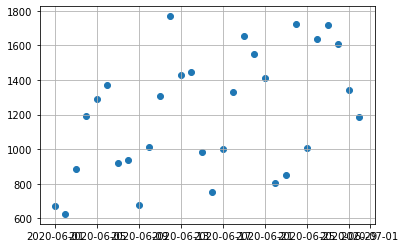

In [13]:
plt.scatter(x=month_df.index, y=month_df['Cases'])
plt.grid()

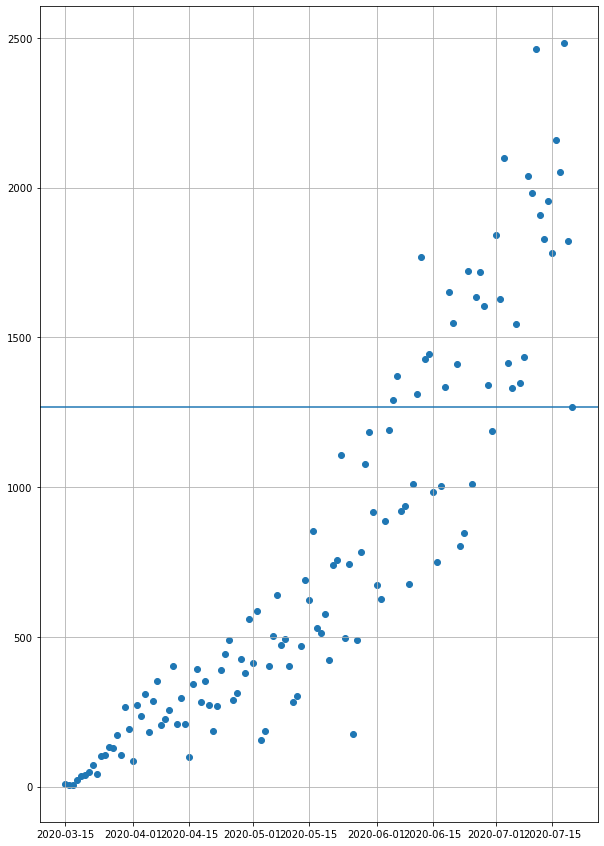

In [14]:

plt.figure(figsize=[10,15])
plt.scatter(x=df.index, y=df['Cases'])
plt.axhline(y=1268)

plt.grid()

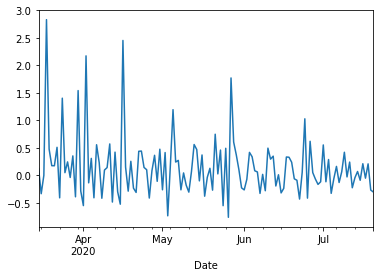

In [19]:
df.Change.plot()

In [20]:
df['Lagged_Change'] = df.Change.shift()

In [53]:
df = df.dropna()
df = df.set_index('Date')
df.head()

KeyError: "None of ['Date'] are in the columns"

In [65]:
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

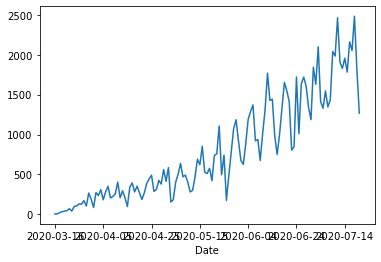

In [66]:
df.Cases.plot()

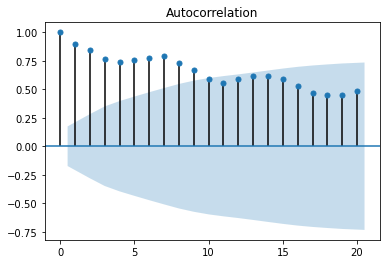

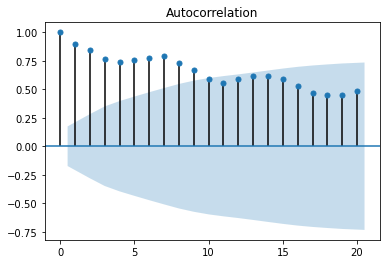

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.Cases, lags=20)

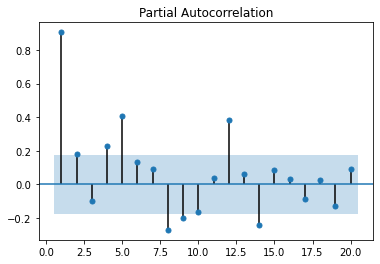

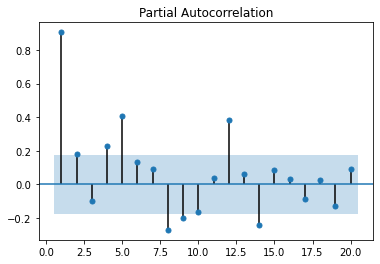

In [68]:
plot_pacf(df.Cases, zero=False, lags=20)

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.Cases, order=(2, 1, 2))

C:\Users\lorie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\lorie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [70]:
results = model.fit()

In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Cases   No. Observations:                  126
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -858.723
Method:                       css-mle   S.D. of innovations            218.640
Date:                Tue, 21 Jul 2020   AIC                           1729.447
Time:                        09:34:27   BIC                           1746.464
Sample:                    03-17-2020   HQIC                          1736.360
                         - 07-20-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.1421      3.381      4.775      0.000       9.516      22.768
ar.L1.D.Cases     1.0424      0.120      8.693      0.000       0.807       1.277
ar.L2.D.Cases    -0.5262      0.087     -6.043      0.000      -0.697      -0.356
ma.L1.D.Cases    -1.6588      0.123    -13.478      0.000      -1.900      -1.418
ma.L2.D.Cases     0.7410      0.110      6.757      0.000       0.526       0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9905           -0.9589j            1.3786           -0.1224
AR.2            0.9905           +0.9589j            1.3786            0.1224
MA.1            1.1193           -0.3109j            1.1617           -0.0431
MA.2            1.1193           +0.3109j            1.1617            0.0431
-----------------------------------------------------------------------------
"""

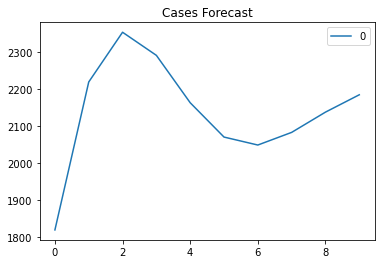

In [89]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Cases Forecast")

In [78]:
# A second model with a different order
model2 = ARIMA(df.Cases, order=(2, 1, 1))

C:\Users\lorie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\lorie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [79]:
res2 = model2.fit()

In [80]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Cases   No. Observations:                  126
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -866.737
Method:                       css-mle   S.D. of innovations            233.848
Date:                Tue, 21 Jul 2020   AIC                           1743.473
Time:                        09:35:03   BIC                           1757.654
Sample:                    03-17-2020   HQIC                          1749.235
                         - 07-20-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.4951      2.801      5.533      0.000      10.006      20.984
ar.L1.D.Cases     0.3531      0.098      3.598      0.000       0.161       0.545
ar.L2.D.Cases    -0.1011      0.096     -1.053      0.292      -0.289       0.087
ma.L1.D.Cases    -0.9076      0.036    -25.114      0.000      -0.978      -0.837
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7470           -2.6160j            3.1458           -0.1563
AR.2            1.7470           +2.6160j            3.1458            0.1563
MA.1            1.1019           +0.0000j            1.1019            0.0000
-----------------------------------------------------------------------------
"""

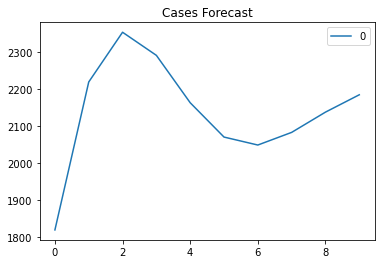

In [88]:
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Cases Forecast")